In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics
import os

In [48]:
df = pd.read_csv('Kyphosis.csv')

In [49]:
x = df.drop('Kyphosis', axis =1)
y = df['Kyphosis']

In [50]:
print(y.value_counts(normalize=True)*100)

Kyphosis
absent     79.012346
present    20.987654
Name: proportion, dtype: float64


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y,random_state=24)

In [53]:
print("for Y_train : \n",y_train.value_counts(normalize=True)*100)
print()
print("for y_test : \n ",y_test.value_counts(normalize=True)*100)


for Y_train : 
 Kyphosis
absent     78.571429
present    21.428571
Name: proportion, dtype: float64

for y_test : 
  Kyphosis
absent     80.0
present    20.0
Name: proportion, dtype: float64


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logr = LogisticRegression()

logr.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred_prob = logr.predict_proba(x_test)
y_pred = logr.predict(x_test)
y_pred

array(['absent', 'present', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present'], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {ac}')

Accuracy Score : 0.76


In [58]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,absent,present,All
Kyphosis,,,
absent,16,4,20
present,2,3,5
All,18,7,25


In [59]:
# Show accuracy from crosstab without using accuracy score
# Error values i.e, (absent, absent) = 16; (present, present) = 3; total = 25
(16+3)/25

0.76

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)

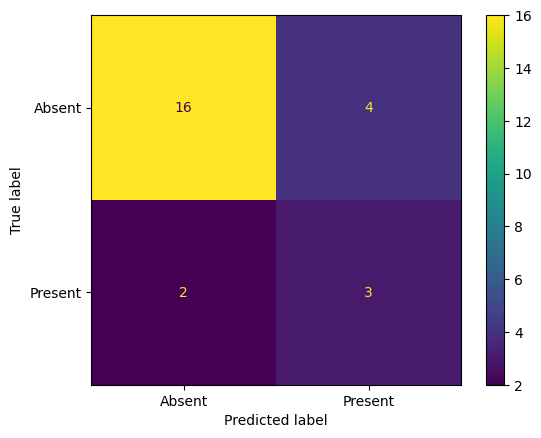

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot()
plt.show()

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
results = cross_val_score(logr, x, y, cv=kfold)
print(results.mean())

0.8411764705882353


In [63]:
'''
In 'Present' 3 out off 5 are predicted correct
so, Recall(P) = 3/5 = 0.6

In 'Present' 3 out off 7 are predicted correct
so, Precision(P) = 3/7 = 0.4285

In 'Absent' 16 out off 20 are predicted correct
so, Recall(P) = 16/20 = 0.8

In 'Absent' 16 out off 18 are predicted correct
so, Precision(P) = 16/18 = 0.8888
'''

pd.crosstab(y_test, y_pred, margins=True)

col_0,absent,present,All
Kyphosis,,,
absent,16,4,20
present,2,3,5
All,18,7,25


In [64]:
print(recall_score(y_test, y_pred, pos_label='present'))
print(precision_score(y_test, y_pred, pos_label='present'))

print(recall_score(y_test, y_pred, pos_label='absent'))
print(precision_score(y_test, y_pred, pos_label='absent'))

0.6
0.42857142857142855
0.8
0.8888888888888888


In [65]:
print(f1_score(y_test, y_pred, pos_label='present'))
print(f1_score(y_test, y_pred, pos_label='absent'))

0.5
0.8421052631578948


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.89      0.80      0.84        20
     present       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



In [ ]:
'''
macro avg -> simple average of absent and present
(0.89 + 0.43)/2 = 0.66

weighted avg -> 

'''